In [ ]:
pip install -r requirements.txt
X = pd.read_pickle("data/X.pkl")
y = pd.read_pickle("data/y.pkl")

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

In [54]:
# Let's test several different models against accuracy and AUC
import warnings
warnings.filterwarnings("ignore")
#Run through the additional models to find the highest score
models = []
results_train = []
models.append(('Logistic Regression',LogisticRegression(random_state=11, solver='lbfgs', max_iter=1000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=11)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(random_state=11)))
models.append(('Random Forest', RandomForestClassifier(random_state=11)))
models.append(('GB Boost', GradientBoostingClassifier(random_state=11)))
models.append(('Ada Boost', AdaBoostClassifier(random_state=11)))
models.append(('SGD', SGDClassifier(random_state=11)))
models.append(('XG', XGBClassifier(random_state=11)))
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = KFold(n_splits=10, random_state=11, shuffle=True)
  model.fit(X_train, y_train)
  scores = cross_val_score(model, X_train, y_train, cv = kfold, scoring=scoring)
  #auc = cross_val_score(model, X_train, y_train, cv = kfold, scoring='roc_auc')

  print(f"Accuracy Score with {name} is: {scores.mean()}")
  print(f"Accuracy STD with {name} is: {scores.std()}")
  #print(f"AUC of {name}: {auc.mean()}")
  #print(f"AUC STD of {name}: {auc.std()}")
  print()

Accuracy Score with Logistic Regression is: 0.8056770397157722
Accuracy STD with Logistic Regression is: 0.008901712139050942

Accuracy Score with KNN is: 0.9047536162923487
Accuracy STD with KNN is: 0.005799810026129583

Accuracy Score with CART is: 0.8856589265321659
Accuracy STD with CART is: 0.0076303801075686675

Accuracy Score with NB is: 0.6831135642684939
Accuracy STD with NB is: 0.005833062487648272

Accuracy Score with SVM is: 0.6788330478365691
Accuracy STD with SVM is: 0.005540108228478276

Accuracy Score with Random Forest is: 0.8793501141987058
Accuracy STD with Random Forest is: 0.009217729523130052

Accuracy Score with GB Boost is: 0.8646494099733536
Accuracy STD with GB Boost is: 0.005964320148703818

Accuracy Score with Ada Boost is: 0.8040439982235756
Accuracy STD with Ada Boost is: 0.007980687939212987

Accuracy Score with SGD is: 0.56306220657277
Accuracy STD with SGD is: 0.15423416140908125

Accuracy Score with XG is: 0.8969803641669838
Accuracy STD with XG is: 0.

In [56]:
kfold = KFold(n_splits=10, random_state=11, shuffle=True)
XGboost.fit(X_train, y_train)
scores_train = cross_val_score(XGboost, X_train, y_train, cv = kfold, scoring=scoring)
auc_train = cross_val_score(XGboost, X_train, y_train, cv = kfold, scoring='roc_auc')
scores_test = cross_val_score(XGboost, X_test, y_test, cv = kfold, scoring=scoring)
auc_test = cross_val_score(XGboost, X_test, y_test, cv = kfold, scoring='roc_auc')

print(f"Train Accuracy Score with {name} is: {scores_train.mean()}")
print(f"Test Accuracy Score with {name} is: {scores_test.mean()}")
print(f"Train AUC of {name}: {auc_train.mean()}")
print(f"Test AUC of {name}: {auc_test.mean()}")
print()

Train Accuracy Score with XG is: 0.8969803641669838
Test Accuracy Score with XG is: 0.883574244415243
Train AUC of XG: 0.937203826354812
Test AUC of XG: 0.922502799532268



In [57]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [175]:
def objective(trial):
    # Define hyperparameter search space
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 10),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 10)
    }

    # Initialize model with suggested parameters
    model = XGBClassifier(**params, use_label_encoder=False, eval_metric="logloss")

    # Train the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    f1 = f1_score(y_test, y_pred, average='binary')
    
    return f1  # Optuna will maximize this metric

In [60]:
import optuna

In [196]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, n_jobs=-1)
print("Best Hyperparameters:", study.best_params)

[I 2025-03-09 21:17:07,548] A new study created in memory with name: no-name-8115937f-0c58-423d-b3ae-a5416754a5c6
[I 2025-03-09 21:17:08,776] Trial 0 finished with value: 0.7792723263506064 and parameters: {'n_estimators': 121, 'max_depth': 4, 'learning_rate': 0.2857954517072206, 'subsample': 0.8910047811516812, 'colsample_bytree': 0.5202714205745274, 'gamma': 0.7070071705932091, 'reg_alpha': 8.125730102855082, 'reg_lambda': 2.8251477202219624}. Best is trial 0 with value: 0.7792723263506064.
[I 2025-03-09 21:17:09,133] Trial 8 finished with value: 0.7132899628252788 and parameters: {'n_estimators': 91, 'max_depth': 5, 'learning_rate': 0.03421140722813598, 'subsample': 0.9428021723652702, 'colsample_bytree': 0.5030418010135043, 'gamma': 0.37757876292653536, 'reg_alpha': 5.079041142900612, 'reg_lambda': 4.8753807998704515}. Best is trial 0 with value: 0.7792723263506064.
[I 2025-03-09 21:17:09,438] Trial 9 finished with value: 0.7505016722408027 and parameters: {'n_estimators': 190, 'ma

Best Hyperparameters: {'n_estimators': 315, 'max_depth': 12, 'learning_rate': 0.22174540319773867, 'subsample': 0.6945534945484058, 'colsample_bytree': 0.9884497358478943, 'gamma': 1.7480331954034232, 'reg_alpha': 0.34147018229598114, 'reg_lambda': 0.2012548372661751}


In [197]:
best_params = study.best_params
best_model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric="logloss")
best_model.fit(X_train, y_train)

# Evaluate the final model
y_pred_final = best_model.predict(X_test)
# Compute classification metrics
precision = precision_score(y_test, y_pred_final, average='binary')  # Change to 'macro' or 'binary' if needed
recall = recall_score(y_test, y_pred_final, average='binary')
f1 = f1_score(y_test, y_pred_final, average='binary')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Full classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_final))


Precision: 0.8997
Recall: 0.7612
F1 Score: 0.8247

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92      5089
           1       0.90      0.76      0.82      2521

    accuracy                           0.89      7610
   macro avg       0.89      0.86      0.87      7610
weighted avg       0.89      0.89      0.89      7610



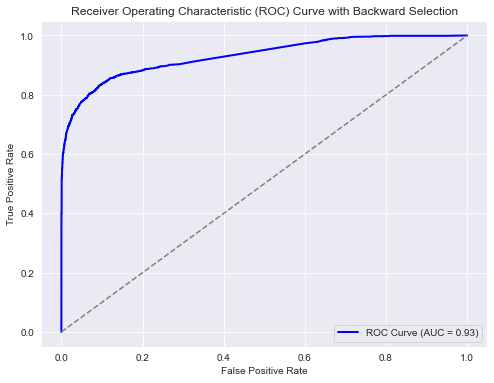

In [ ]:
# Get predicted probabilities
y_prob = best_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve with Backward Selection')
plt.legend(loc="lower right")
plt.grid()
plt.savefig("output/my_plot28.png")


![My Plot](my_plot28.png)

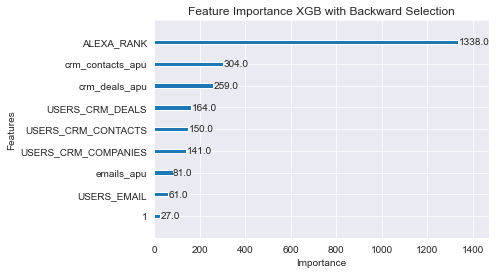

In [ ]:
# let's use built-in feature importance function
#model = XGBClassifier()
best_model.fit(X, y)
plot_importance(best_model)
plt.title("Feature Importance XGB with Backward Selection")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.savefig("output/my_plot25.png")  # Saves the figure
plt.show()

![My Plot](my_plot25.png)

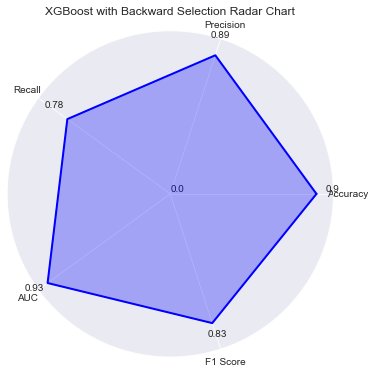

In [ ]:
from math import pi
from sklearn.metrics import accuracy_score

# Compute Accuracy
accuracy = accuracy_score(y_test, y_pred_final)

# Store metrics in a dictionary
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "AUC": roc_auc,
    "F1 Score": f1
}

# Convert dictionary to lists
labels = list(metrics.keys())
values = list(metrics.values())

# Close the radar chart by repeating the first value
values += values[:1]

# Compute angles for each axis
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # Close the plot

# Create radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Plot data
ax.fill(angles, values, color="blue", alpha=0.3)
ax.plot(angles, values, color="blue", linewidth=2)

# Add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

ax.set_yticks(np.arange(0, max(values) + 5, 5))
ax.set_yticklabels(np.arange(0, max(values) + 5, 5))

for angle, value in zip(angles[:-1], values[:-1]):
    ax.text(angle, value+0.1 , str(round(value,2)), ha='center', va='bottom')

# Set radial limits (optional, for better visibility)
ax.set_ylim(0, 1)

# Show the plot
plt.title("XGBoost with Backward Selection Radar Chart")
plt.savefig("output/my_plot12.png")
plt.show()

![My Plot](my_plot12.png)

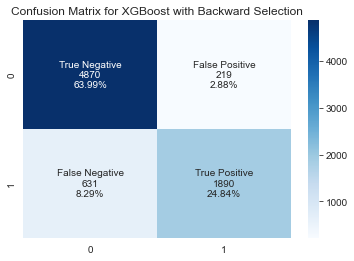

In [ ]:
# Now we set up a pipeline for future use and 
#XGboost.fit(X_train, y_train)
#y_predict = XGboost.predict(X_train)
matrix = confusion_matrix(y_test, y_pred_final)
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues')
plt.title("Confusion Matrix for XGBoost with Backward Selection")
plt.savefig("output/my_plot27.png")  # Saves the figure
# Our suspicion is confirmed, there are many more false negatives
# than false positives. Given more time, we might investigate why

![My Plot](my_plot27.png)

In [105]:
pd.set_option('display.max_columns',None)
X.head(1)

,ACTIONS_CRM_CONTACTS,ACTIONS_CRM_COMPANIES,ACTIONS_CRM_DEALS,ACTIONS_EMAIL,USERS_CRM_CONTACTS,USERS_CRM_COMPANIES,USERS_CRM_DEALS,USERS_EMAIL,ALEXA_RANK,1,"10,001 or more",1001 to 10000,11 to 25,2 to 5,201 to 1000,26 to 50,51 to 200,6 to 10,date,crm_contacts_apu,crm_companies_apu,crm_deals_apu,emails_apu
0,278,0,34,0,2,0,2,0,16000001.0,False,False,False,False,True,False,False,False,False,2020-06-01,139.0,0.0,17.0,0.0


In [204]:
y = cust_actions_clean['is_customer']
X = cust_actions_clean.drop(columns=['is_customer','date'])
# Split data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

In [205]:

# Initialize and train the Lasso-penalized logistic regression model
lasso_logreg = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)
lasso_logreg.fit(X_train, y_train)


# Predict on the test set
y_pred = lasso_logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8185282522996058


In [206]:
# Print selected variables
lasso_coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": abs(lasso_logreg.coef_.flatten()) # Flatten in case it's a 2D array
})
# Method 3: Using a loop for specific columns
df_formatted_loop = lasso_coef_df.copy()
for col in df_formatted_loop.columns:
    if df_formatted_loop[col].dtype == 'float64':
        df_formatted_loop[col] = df_formatted_loop[col].apply(lambda x: f"{x:.6f}")
print("\nMethod 3:")
print(df_formatted_loop.sort_values('Coefficient'))
# Print the table
#print(lasso_coef_df.sort_values('Coefficient'))


Method 3:
                  Feature Coefficient
8              ALEXA_RANK    0.000000
0    ACTIONS_CRM_CONTACTS    0.000155
1   ACTIONS_CRM_COMPANIES    0.000217
18       crm_contacts_apu    0.001163
19      crm_companies_apu    0.002885
2       ACTIONS_CRM_DEALS    0.005202
20          crm_deals_apu    0.009090
3           ACTIONS_EMAIL    0.028807
21             emails_apu    0.114341
5     USERS_CRM_COMPANIES    0.123288
11          1001 to 10000    0.277437
4      USERS_CRM_CONTACTS    0.367143
15               26 to 50    0.378680
6         USERS_CRM_DEALS    0.400474
14            201 to 1000    0.417181
16              51 to 200    0.454631
12               11 to 25    0.467025
7             USERS_EMAIL    0.485981
13                 2 to 5    0.507706
10         10,001 or more    0.595365
17                6 to 10    0.931084
9                       1    1.803202


In [207]:
#Keep variables with coefficients > 0.1 to encourage a more sparse model
y = cust_actions_clean['is_customer']
X = cust_actions_clean.drop(columns=['is_customer','ALEXA_RANK','date','ACTIONS_CRM_CONTACTS','ACTIONS_CRM_COMPANIES',
                       'crm_contacts_apu','crm_companies_apu','ACTIONS_CRM_DEALS',
                       'crm_deals_apu','ACTIONS_EMAIL'])

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

In [209]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, n_jobs=-1)
print("Best Hyperparameters:", study.best_params)

[I 2025-03-09 21:20:41,453] A new study created in memory with name: no-name-1f486a3f-c0cb-44b2-891a-248a6233f500
[I 2025-03-09 21:20:42,899] Trial 9 finished with value: 0.696102725839153 and parameters: {'n_estimators': 75, 'max_depth': 15, 'learning_rate': 0.1537609981051204, 'subsample': 0.8950189577828017, 'colsample_bytree': 0.8333015900881541, 'gamma': 3.5865518294312535, 'reg_alpha': 5.839233996699988, 'reg_lambda': 8.805817772115459}. Best is trial 9 with value: 0.696102725839153.
[I 2025-03-09 21:20:44,363] Trial 5 finished with value: 0.6725536992840095 and parameters: {'n_estimators': 114, 'max_depth': 8, 'learning_rate': 0.014226533516252318, 'subsample': 0.6753777522602553, 'colsample_bytree': 0.7203737183021396, 'gamma': 0.3935947074586976, 'reg_alpha': 1.505855133787929, 'reg_lambda': 9.350634033891914}. Best is trial 9 with value: 0.696102725839153.
[I 2025-03-09 21:20:44,636] Trial 0 finished with value: 0.6983127109111361 and parameters: {'n_estimators': 285, 'max_de

Best Hyperparameters: {'n_estimators': 452, 'max_depth': 9, 'learning_rate': 0.04293967864841306, 'subsample': 0.5704761897312014, 'colsample_bytree': 0.9742750030767562, 'gamma': 0.8719081458526039, 'reg_alpha': 0.9312165684387766, 'reg_lambda': 2.158206184120673}


In [210]:
best_params = study.best_params
best_model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric="logloss")
best_model.fit(X_train, y_train)

# Evaluate the final model
y_pred_final = best_model.predict(X_test)
# Compute classification metrics
accuracy = accuracy_score(y_test, y_pred_final)
precision = precision_score(y_test, y_pred_final, average='binary')  # Change to 'macro' or 'binary' if needed
recall = recall_score(y_test, y_pred_final, average='binary')
f1 = f1_score(y_test, y_pred_final, average='binary')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

# Full classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_final))


Precision: 0.8319
Recall: 0.6319
F1 Score: 0.7182
Accuracy: 0.8357

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.88      5089
           1       0.83      0.63      0.72      2521

    accuracy                           0.84      7610
   macro avg       0.83      0.78      0.80      7610
weighted avg       0.84      0.84      0.83      7610



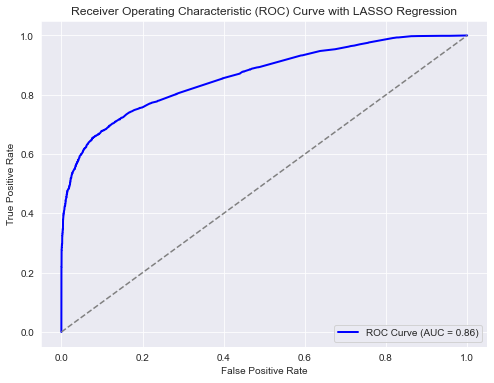

In [ ]:
# Get predicted probabilities
y_prob = best_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve with LASSO Regression')
plt.legend(loc="lower right")
plt.grid()
plt.savefig("output/my_plot29.png")


![My Plot](my_plot29.png)

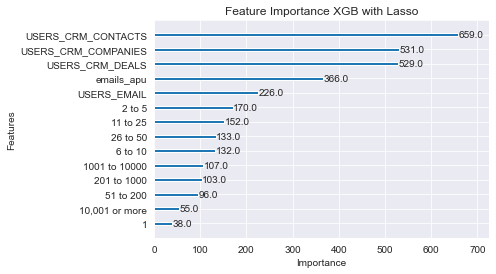

In [ ]:
# let's use built-in feature importance function
#model = XGBClassifier()
best_model.fit(X_train, y_train)
plot_importance(best_model)
plt.title("Feature Importance XGB with Lasso")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.savefig("output/my_plot22.png")  # Saves the figure
plt.show()

![My Plot](my_plot22.png)

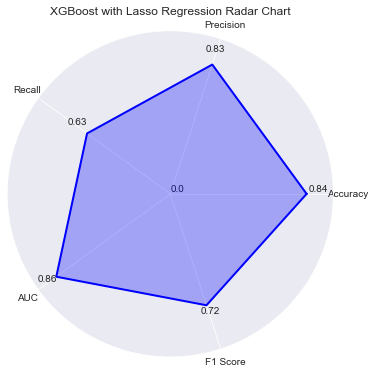

In [ ]:
# Store metrics in a dictionary
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "AUC": roc_auc,
    "F1 Score": f1
}

# Convert dictionary to lists
labels = list(metrics.keys())
values = list(metrics.values())

# Close the radar chart by repeating the first value
values += values[:1]

# Compute angles for each axis
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # Close the plot

# Create radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Plot data
ax.fill(angles, values, color="blue", alpha=0.3)
ax.plot(angles, values, color="blue", linewidth=2)

# Add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

ax.set_yticks(np.arange(0, max(values) + 5, 5))
ax.set_yticklabels(np.arange(0, max(values) + 5, 5))

for angle, value in zip(angles[:-1], values[:-1]):
    ax.text(angle, value+0.07 , str(round(value,2)), ha='center', va='bottom')

# Set radial limits (optional, for better visibility)
ax.set_ylim(0, 1)

# Show the plot
plt.title("XGBoost with Lasso Regression Radar Chart")
plt.savefig("output/my_plot23.png")
plt.show()

![My Plot](my_plot23.png)

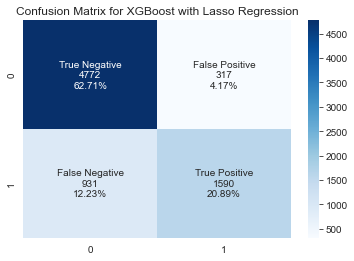

In [ ]:
# Now we set up a pipeline for future use and 
#XGboost.fit(X_train, y_train)
#y_predict = XGboost.predict(X_train)
matrix = confusion_matrix(y_test, y_pred_final)
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues')
plt.title("Confusion Matrix for XGBoost with Lasso Regression")
plt.savefig("output/my_plot24.png")  # Saves the figure
# Our suspicion is confirmed, there are many more false negatives
# than false positives. Given more time, we might investigate why